<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/4.%20%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_(Matplotlib_Seaborn_Pandas)_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика. Визуальный анализ данных (Matplotlib/Seaborn/Pandas). Часть 2


1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/3.%20%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_Matplotlib_Seaborn_Plotly.ipynb)
- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [1]:
 # !pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

In [3]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("./data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


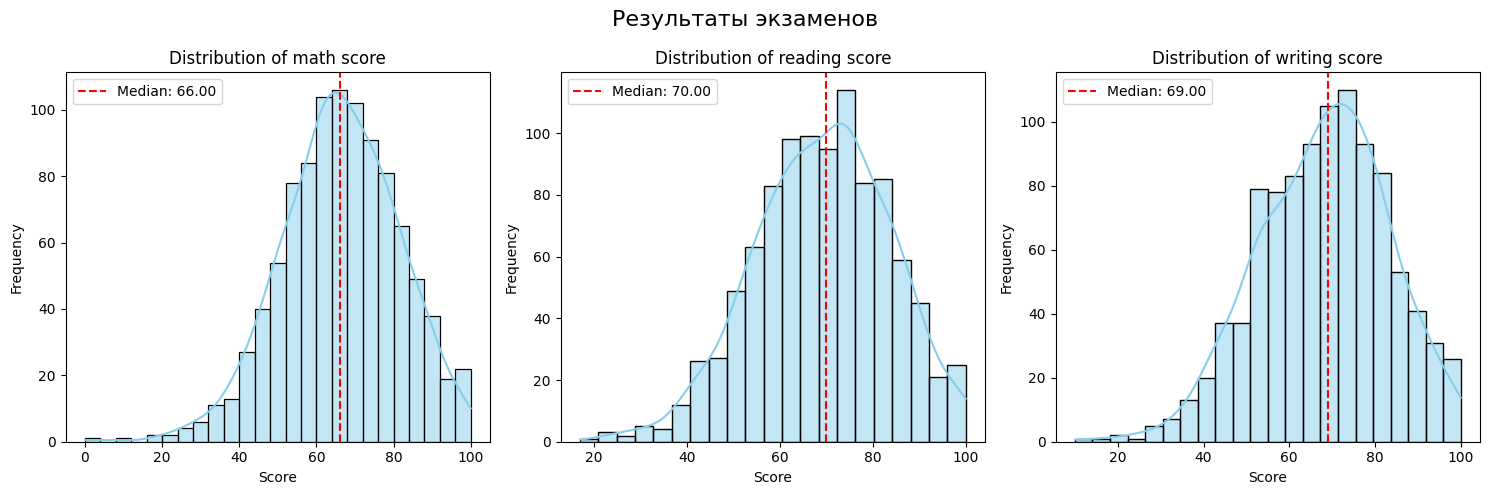

In [4]:
# Создаем фигуру и подграфики в одном ряду
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Список предметов
subjects = ['math score', 'reading score', 'writing score']

# Создаем гистограммы для каждого предмета и считаем медианные значения
for i, subject in enumerate(subjects):
    sns.histplot(df[subject], ax=axes[i], kde=True, color='skyblue')
    median_score = df[subject].median()
    axes[i].axvline(median_score, color='red', linestyle='--', label=f'Median: {median_score:.2f}')
    axes[i].set_title(f'Distribution of {subject}')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Общий заголовок
plt.suptitle('Результаты экзаменов', fontsize=16)
plt.tight_layout()
plt.show()

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


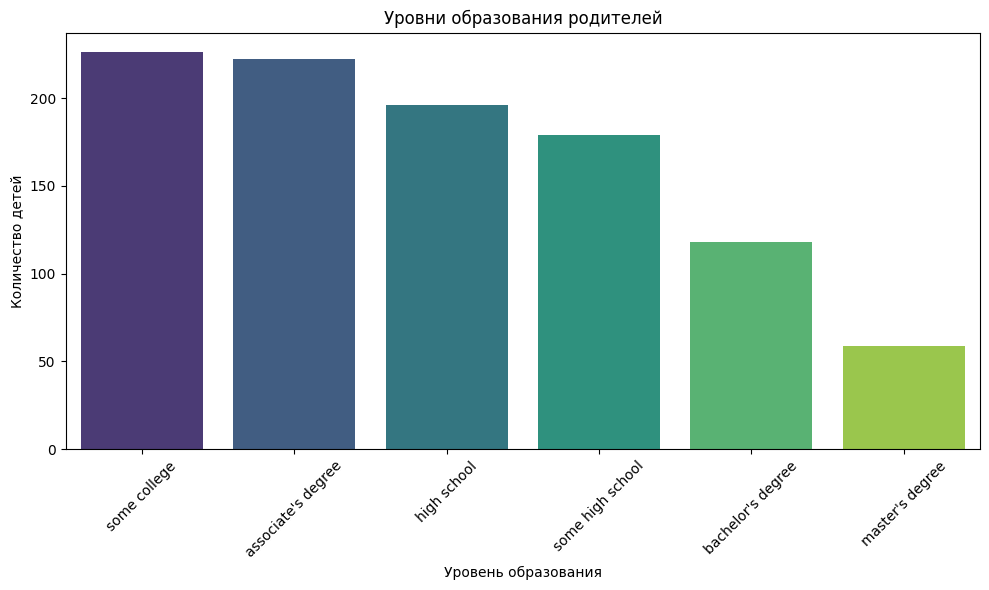

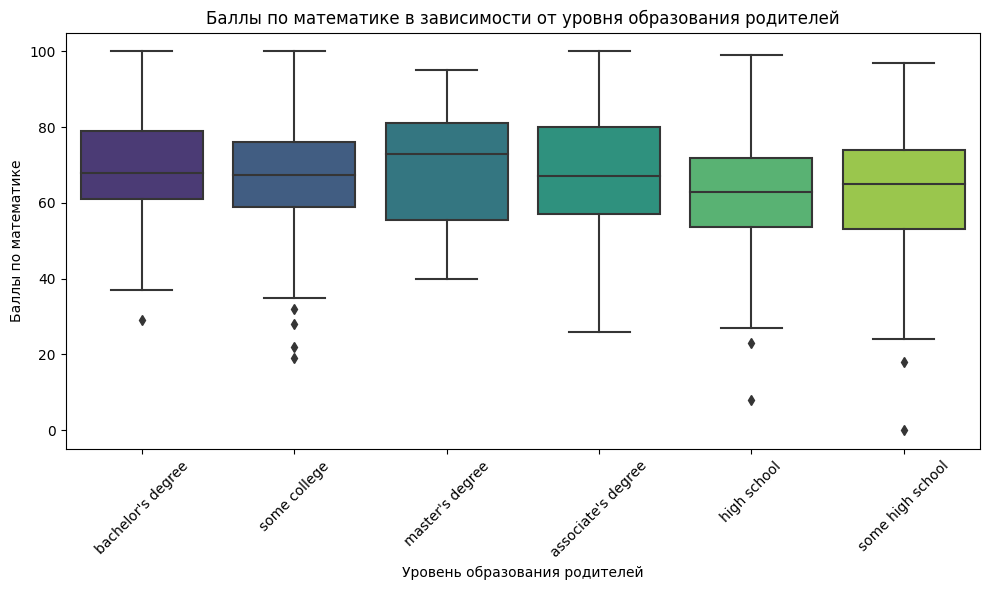

In [5]:
# Подсчет количества строк для каждого уровня образования
education_counts = df['parental level of education'].value_counts()

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')
plt.title('Уровни образования родителей')
plt.xlabel('Уровень образования')
plt.ylabel('Количество детей')
plt.xticks(rotation=45)  # Поворот меток по оси X для улучшения читаемости
plt.tight_layout()

# Ответ на вопрос о баллах по математике : ДА ОТЛИЧАЮТСЯ
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='parental level of education', y='math score', palette='viridis')
plt.title('Баллы по математике в зависимости от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Баллы по математике')
plt.xticks(rotation=45)  # Поворот меток по оси X для улучшения читаемости 
plt.tight_layout()
plt.show()

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [6]:
# Создаем условие, которое проверяет, что баллы по всем предметам (math score, reading score, writing score)
# больше 90 для каждой строки
condition = (df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90)

# Используем условие для фильтрации строк в датафрейме и подсчета их числа
num_students_above_90 = len(df[condition])

print(f"Число студенток, набравших больше 90 баллов по всем предметам: {num_students_above_90}")

Число студенток, набравших больше 90 баллов по всем предметам: 23


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [7]:
gender_scores_stats = df.groupby('gender').agg({
    'math score': ['min', 'max', 'median'],
    'reading score': ['min', 'max', 'median'],
    'writing score': ['min', 'max', 'median']
})

# Выводим статистику
print(gender_scores_stats)

       math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0  


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете agg())

ОТВЕТ: Обед влияет

In [11]:
# Группируем данные по полу и обеду, и вычисляем средний балл для каждой группы
gender_lunch_scores = df.groupby(['gender', 'lunch'])[['math score', 'reading score', 'writing score']].mean()

# Группируем данные по полу и подготовке к тесту, и вычисляем средний балл для каждой группы
gender_prep_scores = df.groupby(['gender', 'test preparation course'])[['math score', 'reading score', 'writing score']].mean()

# Выводим результаты
print("Средний балл по полу и обеду:")
print(gender_lunch_scores)

print("\nСредний балл по полу и подготовке к тесту:")
print(gender_prep_scores)

Средний балл по полу и обеду:
                     math score  reading score  writing score
gender lunch                                                 
female free/reduced   55.814815      67.386243      66.444444
       standard       68.124620      75.607903      75.927052
male   free/reduced   62.457831      61.542169      59.126506
       standard       72.022152      67.537975      65.509494

Средний балл по полу и подготовке к тесту:
                                math score  reading score  writing score
gender test preparation course                                          
female completed                 67.195652      77.375000      78.793478
       none                      61.670659      69.982036      68.982036
male   completed                 72.339080      70.212644      69.793103
       none                      66.688312      62.795455      59.649351


#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

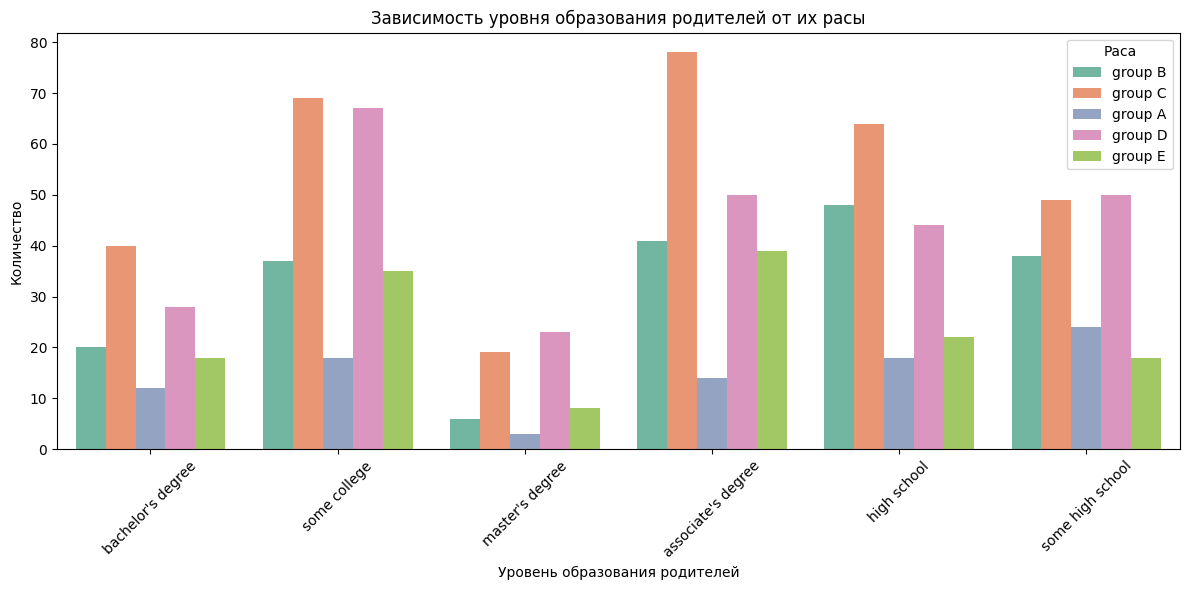

In [13]:
# Создаем countplot для уровня образования родителей (parental level of education) и расы (race)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='parental level of education', hue='race/ethnicity', palette='Set2')
plt.title('Зависимость уровня образования родителей от их расы')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.xticks(rotation=45)  # Поворот меток по оси X для улучшения читаемости
plt.legend(title='Раса', loc='upper right')
plt.tight_layout()
plt.show() 

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

ОТВЕТ: дети, родители которых закончили только старшую школу, ходят чаще на курсы

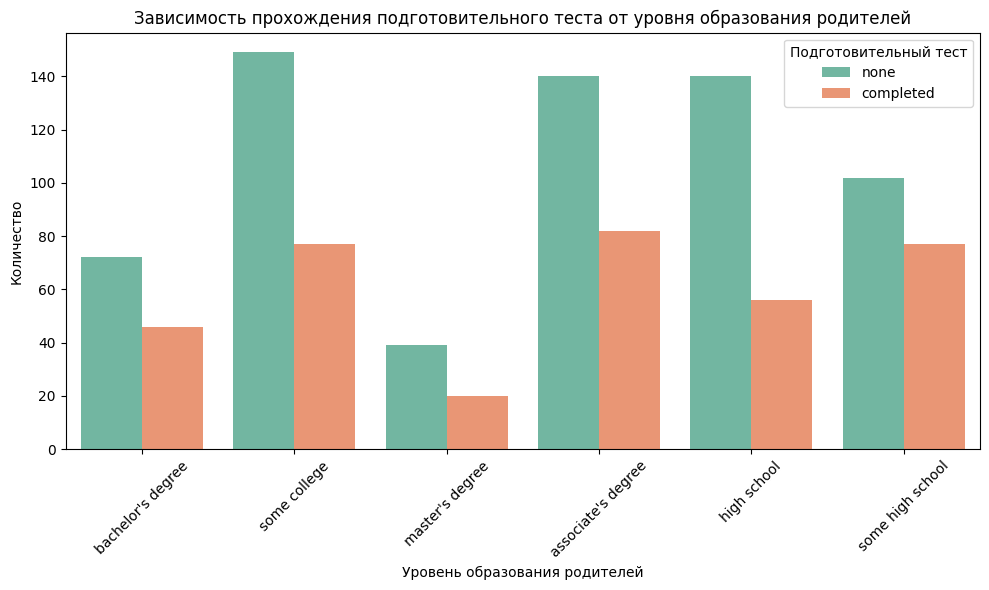

In [14]:
# Создаем countplot для уровня образования родителей и прохождения подготовительного теста
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='parental level of education', hue='test preparation course', palette='Set2')
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.xticks(rotation=45)  # Поворот меток по оси X для улучшения читаемости
plt.legend(title='Подготовительный тест', loc='upper right')
plt.tight_layout()
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

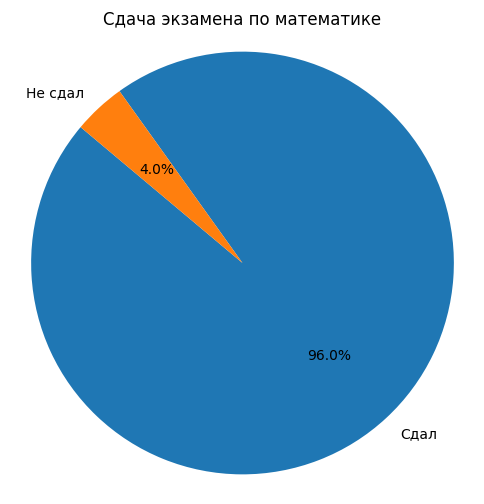

In [15]:

df['сдал_математику'] = df['math score'] >= 40

passed_math = df['сдал_математику'].sum()
failed_math = len(df) - passed_math


data = [passed_math, failed_math]
labels = ['Сдал', 'Не сдал']


plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Сдача экзамена по математике')
plt.axis('equal')  
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

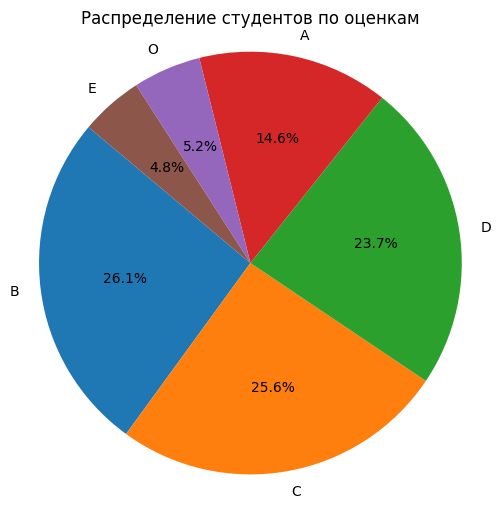

In [17]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

def assign_grade(row):
    average_score = row['average score']
    math_score = row['math score']
    
    if math_score < 40:
        return 'E'
    elif average_score >= 90:
        return 'O'
    elif average_score >= 80:
        return 'A'
    elif average_score >= 70:
        return 'B'
    elif average_score >= 60:
        return 'C'
    elif average_score >= 41:
        return 'D'
    else:
        return 'E'

df['grade'] = df.apply(assign_grade, axis=1)


grade_counts = df['grade'].value_counts()

data = grade_counts.values
labels = grade_counts.index


plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Распределение студентов по оценкам')
plt.axis('equal')  
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

ОТВЕТ: FEMALE (ЖЕНСКИЙ)

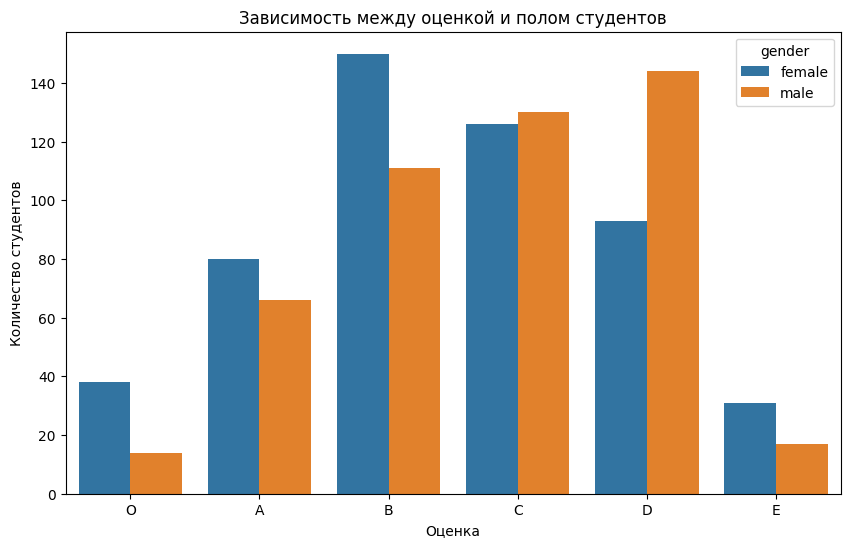

In [18]:
# Вычисляем средний балл для каждого студента
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Функция для выставления оценки
def assign_grade(row):
    average_score = row['average score']
    math_score = row['math score']
    
    if math_score < 40:
        return 'E'
    elif average_score >= 90:
        return 'O'
    elif average_score >= 80:
        return 'A'
    elif average_score >= 70:
        return 'B'
    elif average_score >= 60:
        return 'C'
    elif average_score >= 41:
        return 'D'
    else:
        return 'E'

# Применяем функцию для выставления оценок
df['grade'] = df.apply(assign_grade, axis=1)

# Строим countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grade', hue='gender', order=['O', 'A', 'B', 'C', 'D', 'E'])
plt.title('Зависимость между оценкой и полом студентов')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.show()